**Tugas Akhir Pemrograman Bahasa Alami** <br/>
Sentiment Analysis menggunakan Metode Logistic Regression <br/>

---

Nama : Wiweka Yoga Sadewa <br/>
NIM : 20/456382/TK/50512 <br/>

---

Link Presentasi : <br/>
https://www.canva.com/design/DAFThdd2qrg/JsLqxIQiFKXgLu0Wi701yQ/view?utm_content=DAFThdd2qrg&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

### Library

In [ ]:
import re
import numpy as np
import pandas as pd
import json
import tweepy

from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt

### Dataset

In [ ]:
# Datase Yang Digunakan
path = "./dataset"
data1 = pd.read_csv(path + '/dataset_komentar_instagram_cyberbullying.csv')
data2 = pd.read_csv(path + '/dataset_tweet_sentiment_opini_film.csv')

In [ ]:
data1.drop(columns=['Id'], inplace=True)
data1.rename(columns={'Instagram Comment Text': 'Tweet'}, inplace=True)

data2.drop(columns=['Id'], inplace=True)
data2.rename(columns={'Text Tweet': 'Tweet'}, inplace=True)

In [ ]:
data = pd.concat([data1, data2], ignore_index=True)
data

,Sentiment,Tweet
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...
595,positive,Fargo juga adaptasi dari film yang cukup berha...
596,positive,637.000 waw ini sangat keren flm horor dng jum...
597,positive,@filmziarah film yang tenang dan menghanyutkan...
598,positive,Film yg amat menarik. Kisah cinta & kesetiaan ...


### Cleaning dan Preprocessing Dataset

In [ ]:
# Reading Slang data from the file
with open(path+"/slang.txt") as f:
    slang = f.read()
slang = json.loads(slang)

In [ ]:
# Stopword
# jika belum punya
# nltk.download('stopwords') jika belum punya

stopword = stopwords.words('indonesian')
stopword = set(stopword)
stopword

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Preprocessing
def cleaning_text(text):
    # Remove link
    text = re.sub(r'http\S+', '', text)
    #Remove Tag Account
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'USERNAME', '', text)
    #Remove Hastag
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    # Remove retweet
    text = re.sub(r'RT[\s]+', '', text)
    #Remove Special Character
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

def remove_slang_akronim(text, slang = slang):
    text = ''.join(slang[p] if p in slang else p for p in re.split(r'(\W+)', text))
    return text

def remove_stopword(text, stopword = stopword):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stopword]
    return ' '.join(filtered_sentence)

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

def tokenize(text):
    return word_tokenize(text)

def preprocess(text):
    # cleaning text and lowercase
    output = cleaning_text(text)
    # remove slang
    output = remove_slang_akronim(output)
    # remove stopwords
    output = remove_stopword(output)
    # stemming and lemmatization
    output = stemming_and_lemmatization(output)
    # tokenizing
    output = tokenize(output)

    return output

In [ ]:
# contoh preprocessing
text = data['Tweet'][0]
print('original text:\n' + text)
cleantext = cleaning_text(text)
print('\nremove punctuation:\n' + cleantext)
cleantext = remove_slang_akronim(cleantext)
print('\nremove slang:\n' + cleantext)
cleantext = remove_stopword(cleantext)
print('\nremove stopword:\n' + cleantext)
cleantext = stemming_and_lemmatization(cleantext)
print('\nstemming:\n' + cleantext)
cleantext = tokenize(cleantext)
print('\ntokenizing:')
print(cleantext)

original text:
 <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!

remove punctuation:
  tolol gak ada hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar

remove slang:
  tolol gak ada hubungan nya keguguran dengan pakai hijab syari yang kamu bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy otak sama jempol kamu gak singkron sih iya jadinya asal nulis komentar

remove stopword:
tolol gak hubungan nya keguguran pakai hijab syari bilang bayi nya kepanasan didalem gak hubungan nya woyyyy otak jempol gak singkron sih iya nulis komentar

stemming:
tolol gak hubung nya gugur pakai hijab syar bilang bayi nya panas dalem gak hubung nya woyyyy otak jempol gak singkron sih iya nulis komentar

token

In [ ]:
preprocessed_data = data.copy()
preprocessed_data['Tweet'] = data['Tweet'].map(preprocess)

### Training hingga Akurasi

In [ ]:
# split test and train
x = preprocessed_data['Tweet']
y = preprocessed_data['Sentiment']

# mapping, negative = 0, positive = 1
y = y.map({'negative':0, 'positive':1})

train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=2021)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((540,), (540,), (60,), (60,))

In [ ]:
def build_freqs(tweets, ys):
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [ ]:
# create vocabulary / dictionary frequencies
freqs = build_freqs(train_x.tolist(), train_y.tolist())
freqs

{('film', 0): 109,
 ('aneh', 0): 5,
 ('ajaa', 0): 1,
 ('gamau', 0): 1,
 ('berekspektasi', 0): 2,
 ('sih', 0): 24,
 ('angkat', 0): 2,
 ('dr', 0): 12,
 ('buku', 0): 3,
 ('kecewa', 0): 22,
 ('nonton', 0): 38,
 ('nya', 0): 63,
 ('bikin', 0): 17,
 ('derita', 0): 1,
 ('1', 0): 3,
 ('cium', 0): 4,
 ('dpn', 0): 1,
 ('orang', 0): 69,
 ('mantri', 0): 9,
 ('hutan', 0): 9,
 ('lurah', 0): 9,
 ('kecuali', 0): 1,
 ('mabok', 0): 1,
 ('gak', 0): 48,
 ('2', 0): 3,
 ('teman', 0): 11,
 ('helooow', 0): 1,
 ('libat', 0): 1,
 ('bibir', 0): 3,
 ('coba', 0): 4,
 ('bayangin', 0): 1,
 ('sanggup', 0): 1,
 ('lbh', 0): 3,
 ('dasar', 0): 13,
 ('laku', 0): 13,
 ('kids', 0): 2,
 ('jaman', 0): 8,
 ('now', 0): 5,
 ('emg', 0): 7,
 ('bego', 0): 13,
 ('banyak', 0): 8,
 ('micin', 0): 3,
 ('lho', 0): 2,
 ('yah', 0): 7,
 ('sudah', 0): 1,
 ('hidup', 0): 9,
 ('singkat', 0): 2,
 ('dihabisken', 0): 1,
 ('tonton', 0): 10,
 ('jelek', 0): 30,
 ('nonton', 1): 39,
 ('the', 1): 17,
 ('teman', 1): 11,
 ('pilih', 1): 6,
 ('film', 1): 96,

In [ ]:
def extract_features(tweet, freqs):
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))

    #bias term is set to 1
    x[0,0] = 1

    # loop through each word in the list of words
    for word in tweet:

        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.),0)

        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.),0)

    assert(x.shape == (1, 3))
    return x

In [ ]:
x_train = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    x_train[i, :]= extract_features(train_x.to_numpy()[i], freqs)

print(x_train[:5])

[[  1.  97. 115.]
 [  1. 118. 175.]
 [  1. 180. 228.]
 [  1. 171. 418.]
 [  1. 123. 162.]]


In [ ]:
# Gradient Descent
def sigmoid(z):
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
    return h

def gradientDescent(x, y, theta, alpha, num_iters):
    # get 'm', the number of rows in matrix x
    m = x.shape[0]

    for i in range(0, num_iters):

        # get z, the dot product of x and theta
        z = np.dot(x,theta)

        # get the sigmoid of z
        h = sigmoid(z)

        # calculate the cost function
        J = -1/m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))

        # update the weights theta
        theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))

    return float(J), theta

In [ ]:
# training labels corresponding to X
y_train = np.expand_dims(train_y.to_numpy(), axis=1)

# Apply gradient descent
init_theta = np.zeros((3, 1))
init_alpha = 1e-4
iter = 500

J, theta = gradientDescent(x_train, y_train, init_theta, init_alpha, iter)

print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.32163227.
The resulting vector of weights is [0.00049203, 0.0620881, -0.05494092]


In [ ]:
def predict_tweet(tweet, freqs, theta):
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)

    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))

    return y_pred

In [ ]:
y_hat = []
for tweet in test_x:
    # get the label prediction for the tweet
    y_pred = predict_tweet(tweet, freqs, theta)

    if y_pred > 0.5:
        # append 1.0 to the list
        y_hat.append(1)
    else:
        # append 0 to the list
        y_hat.append(0)

In [ ]:
# calculate accuracy
accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)

print(f"Logistic regression model's accuracy = {accuracy:.4f}")

Logistic regression model's accuracy = 0.8333


### Testing Model

In [ ]:
def getPolarity(text):
    return predict_tweet(preprocess(text), freqs, theta)

def getAnalysis(score):
    if score < 0.5:
        return 'Negative'
    else:
        return 'Positive'

def getPrediction(text):
    polarity = getPolarity(text)
    prediction = getAnalysis(polarity)
    return prediction

In [ ]:
# predict single tweet
tweet1 = 'aku benci kalian semua'
getPrediction(tweet1)

'Negative'

### Testing Model dengan Twitter Data

In [ ]:
# Twitter key
# Mohon digunakan dengan bijak
consumerKey = 'FosPbDO1qjdUy4lJIpHGqRu6J'
consumerSecret = 'u50oLz5zvrUBfmykzRiGBzgPDTxf7dwTTJFMoTDbRAoUWV1ANT'
accessToken = '875758575959670784-TPp0E4sBIsSx7uxzzJVCkZt0eHE7jTE'
accessTokenSecret = 'pzZLCss26ZYFSZTaWjRyWGu54TXSk8dGlV8d11AvQ7GKE'

In [ ]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
posts = api.search_tweets(q = 'bocchi', count = 100, lang = 'id', tweet_mode = 'extended')
data = pd.DataFrame([tweet.full_text for tweet in posts] , columns = ['Tweets'])
data

,Tweets
0,Bocchi the rock adalah anime terbaik musim ini...
1,RT @gihachii: rkgk bocchi\n#ぼっち・ざ・ろっく https://...
2,RT @pevellynee: mafuyu and bocchi! https://t.c...
3,RT @pevellynee: mafuyu and bocchi! https://t.c...
4,sedang\nsedang bersyukur aku bukan fans berat ...
5,"@alicestruggles Bocchi, Kirishima, Yaeka 🥰🥰🥰"
6,grgr bocchi the rock beneran mau belajar gitar...
7,@BeepleSneep Bocchi gang strong
8,"@seikafv @animefess_ kak yg bocchi ngomong ""ak..."
9,@Luksss84 Bocchi x Nijika


In [ ]:
data['Tweets'] = data['Tweets'].apply(cleaning_text)
data

,Tweets
0,bocchi the rock adalah anime terbaik musim ini...
1,rkgk bocchi\nぼっちざろっく
2,mafuyu and bocchi
3,mafuyu and bocchi
4,sedang\nsedang bersyukur aku bukan fans berat ...
5,bocchi kirishima yaeka
6,grgr bocchi the rock beneran mau belajar gitar...
7,bocchi gang strong
8,_ kak yg bocchi ngomong aku muak dg diriku se...
9,bocchi x nijika


In [ ]:
data['Analysis'] = data['Tweets'].apply(getPrediction)
data

,Tweets,Analysis
0,bocchi the rock adalah anime terbaik musim ini...,Positive
1,rkgk bocchi\nぼっちざろっく,Positive
2,mafuyu and bocchi,Negative
3,mafuyu and bocchi,Negative
4,sedang\nsedang bersyukur aku bukan fans berat ...,Negative
5,bocchi kirishima yaeka,Positive
6,grgr bocchi the rock beneran mau belajar gitar...,Positive
7,bocchi gang strong,Positive
8,_ kak yg bocchi ngomong aku muak dg diriku se...,Negative
9,bocchi x nijika,Positive


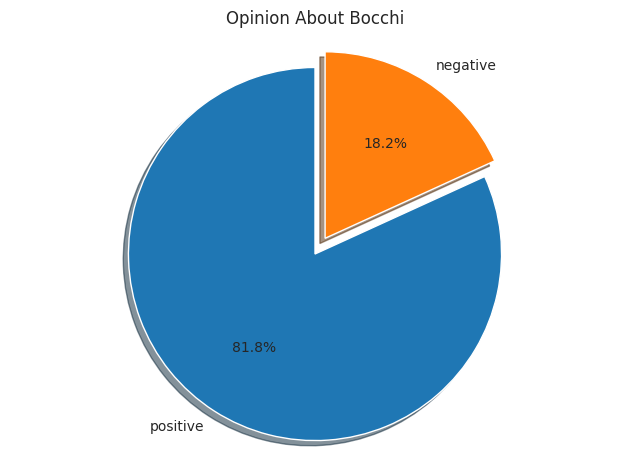

In [ ]:
pos = (data['Analysis']=='Positive').sum()
neg = (data['Analysis']=='Negative').sum()

sent = [pos, neg]
label = 'positive', 'negative'
explode = (0.1, 0)

plt.pie(sent, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Opinion About Bocchi')
plt.axis('equal')
plt.tight_layout()
plt.show()